<a href="https://colab.research.google.com/github/milicaci/obuznie/blob/master/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_14112021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # таблицы
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime
from datetime import *
import datetime as dt
from datetime import datetime
from datetime import date
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


import configparser

config = configparser.ConfigParser()
a = config.read('../../config.ini')

import sys
sys.path.append('../..')

pd.options.mode.chained_assignment = None  # без этого что-то внизу не работаетF


In [ ]:
!pip install plotly

In [ ]:
sbr_intercom = pd.read_csv('data.csv', sep=';' ) # загружаем данные из  файла csv, с разделителм ";"

In [ ]:
sbr_intercom.columns=['id','time']
sbr_intercom=sbr_intercom. sort_values(by = 'time', ascending = True).reset_index()

In [ ]:
sbr_intercom['time'] = pd.to_datetime(sbr_intercom['time'])
sbr_intercom['time']=sbr_intercom['time'].dt.strftime('%x')
sbr_intercom['count']=sbr_intercom.groupby('time')['id'].transform('nunique')
sbr_intercom['time'] = pd.to_datetime(sbr_intercom['time'])

In [ ]:
sbr_intercom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62680 entries, 0 to 62679
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   62680 non-null  int64         
 1   id      62680 non-null  int64         
 2   time    62680 non-null  datetime64[ns]
 3   count   62680 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.9 MB


In [ ]:
df_intercom=sbr_intercom[['time','count']]
df_intercom=df_intercom.drop_duplicates()
df_intercom=df_intercom.rename(columns={'time':'ds', 'count':'y'})
df_intercom=df_intercom.sort_values(by='ds').reset_index(drop=True)
df_intercom=df_intercom.reset_index()

In [ ]:
import datetime
df_intercom['ds_ordinal'] = pd.to_datetime(df_intercom.ds, format="%Y%M%D")
df_intercom['ds_ordinal'] = df_intercom['ds_ordinal'].map(datetime.datetime.toordinal)

In [ ]:
df_intercom['weekday']=df_intercom['ds'].dt.strftime('%A')


In [ ]:
df_intercom.head(10)

,index,ds,y,ds_ordinal,weekday
0,0,2017-01-11,2131,736340,Wednesday
1,1,2017-02-11,2243,736371,Saturday
2,2,2017-03-11,2228,736399,Saturday
3,3,2017-04-11,2225,736430,Tuesday
4,4,2017-05-11,2299,736460,Thursday
5,5,2017-06-11,1939,736491,Sunday
6,6,2017-07-11,2081,736521,Tuesday
7,7,2017-08-11,2591,736552,Friday
8,8,2017-09-11,2367,736583,Monday
9,9,2017-10-11,2168,736613,Wednesday


In [ ]:
def weekdays(row):
    weekday=row.weekday
    if weekday=='Thursday' :
        return '-0.107205'
    if weekday=='Friday' :
        return '-0.034104'
    if weekday=='Saturday' :
        return '0.177063'
    if weekday=='Sunday' :
        return '0.155909'
    if weekday=='Monday' :
        return '-0.053048'
    if weekday=='Tuesday' :
        return '-0.004877'
    if weekday=='Wednesday' :
        return '-0.066004'
        
df_intercom['koeff']=df_intercom.apply (lambda row: weekdays(row), axis=1)

In [ ]:
df_intercom['koeff']=df_intercom['koeff'].astype('float')
df_intercom

,index,ds,y,ds_ordinal,weekday,koeff
0,0,2017-01-11,2131,736340,Wednesday,-0.066004
1,1,2017-02-11,2243,736371,Saturday,0.177063
2,2,2017-03-11,2228,736399,Saturday,0.177063
3,3,2017-04-11,2225,736430,Tuesday,-0.004877
4,4,2017-05-11,2299,736460,Thursday,-0.107205
5,5,2017-06-11,1939,736491,Sunday,0.155909
6,6,2017-07-11,2081,736521,Tuesday,-0.004877
7,7,2017-08-11,2591,736552,Friday,-0.034104
8,8,2017-09-11,2367,736583,Monday,-0.053048
9,9,2017-10-11,2168,736613,Wednesday,-0.066004


In [ ]:
df_intercom['smooth_y']=df_intercom.y+(df_intercom.y*df_intercom.koeff)


In [ ]:
df_intercom['smooth_p']=(df_intercom.smooth_y)/(13)/(8)# предположим, что норма в час 13 шт, 8 часво работы одного человека
df_intercom

,index,ds,y,ds_ordinal,weekday,koeff,smooth_y,smooth_p
0,0,2017-01-11,2131,736340,Wednesday,-0.066004,1990.345476,19.137937
1,1,2017-02-11,2243,736371,Saturday,0.177063,2640.152309,25.386080
2,2,2017-03-11,2228,736399,Saturday,0.177063,2622.496364,25.216311
3,3,2017-04-11,2225,736430,Tuesday,-0.004877,2214.148675,21.289891
4,4,2017-05-11,2299,736460,Thursday,-0.107205,2052.535705,19.735920
5,5,2017-06-11,1939,736491,Sunday,0.155909,2241.307551,21.551034
6,6,2017-07-11,2081,736521,Tuesday,-0.004877,2070.850963,19.912028
7,7,2017-08-11,2591,736552,Friday,-0.034104,2502.636536,24.063813
8,8,2017-09-11,2367,736583,Monday,-0.053048,2241.435384,21.552263
9,9,2017-10-11,2168,736613,Wednesday,-0.066004,2024.903328,19.470224


In [ ]:
df_intercom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       28 non-null     int64         
 1   ds          28 non-null     datetime64[ns]
 2   y           28 non-null     int64         
 3   ds_ordinal  28 non-null     int64         
 4   weekday     28 non-null     object        
 5   koeff       28 non-null     float64       
 6   smooth_y    28 non-null     float64       
 7   smooth_p    28 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 1.9+ KB


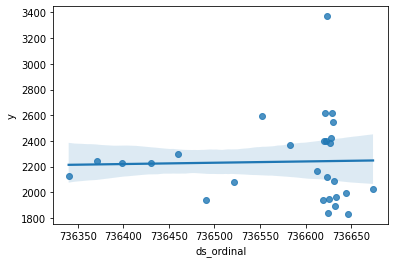

In [ ]:
sns.regplot(x="ds_ordinal", y="y", data=df_intercom)

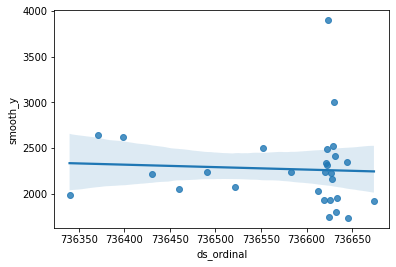

In [ ]:
sns.regplot(x="ds_ordinal", y="smooth_y", data=df_intercom)

Загружаем данные сколько поступило звонков по факту.

In [ ]:
fact = pd.read_csv('fact.csv', sep=';' ) # загружаем данные из  файла csv, с разделителм ";"

In [ ]:
fact['y_i'].astype('float')

0     2010.0
1     1659.0
2     1297.0
3      955.0
4     1112.0
5     2456.0
6     2216.0
7     2080.0
8     1989.0
9     2015.0
10     991.0
11    1547.0
12    2340.0
13    2100.0
Name: y_i, dtype: float64

In [ ]:
#fact['ds'] = fact['ds'].astype('datetime64[ns]')

In [ ]:
fact['smooth_I']=fact['y_i']/(13)/(8)# предположим, что норма в час 13 шт, 8 часво работы одного человека


In [ ]:
fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ds        14 non-null     object 
 1   y_i       14 non-null     int64  
 2   smooth_I  14 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 464.0+ bytes


Расчитываем прогноз

In [ ]:
dates=df_intercom['ds_ordinal']
dates = np.array(dates).reshape((len(dates), 1))

In [ ]:
data=df_intercom['smooth_p']
data = np.array(data).reshape((len(data), 1))

In [ ]:
from sklearn import linear_model
X=dates
y=data
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [ ]:
def date_generator():
  from_date =  datetime.datetime(2017,12, 1)
  while True:
    yield from_date
    from_date = from_date+datetime.timedelta(days=1)

In [ ]:
import itertools
future_dates = itertools.islice(date_generator(), 14)
future_dates=list(future_dates)

In [ ]:
from pandas import DataFrame
future = DataFrame(future_dates,columns=['future_dates'])

In [ ]:
future['weekday']=future['future_dates'].dt.strftime('%A')

In [ ]:
future['future_dates_ordinal'] = pd.to_datetime(future.future_dates, format="%Y%M%D")
future['future_dates_ordinal'] = future['future_dates_ordinal'].map(datetime.datetime.toordinal)

In [ ]:
future_dates_for_model=future['future_dates_ordinal']
future_dates_for_model = np.array(future_dates_for_model).reshape((len(future_dates), 1))

In [ ]:
future_2_weeks_predictions = lm.predict(future_dates_for_model)

In [ ]:
df_predict = pd.DataFrame(data=future_2_weeks_predictions, columns=["predict"])

In [ ]:
df_predict=pd.concat([df_predict, future], axis=1)
df_predict=df_predict.T.drop_duplicates().T

In [ ]:
def weekdays(row):
    weekday=row.weekday
    if weekday=='Thursday' :
        return '-0.107205'
    if weekday=='Friday' :
        return '-0.034104'
    if weekday=='Saturday' :
        return '0.177063'
    if weekday=='Sunday' :
        return '0.155909'
    if weekday=='Monday' :
        return '-0.053048'
    if weekday=='Tuesday' :
        return '-0.004877'
    if weekday=='Wednesday' :
        return '-0.066004'
        
df_predict['koeff']=df_predict.apply (lambda row: weekdays(row), axis=1)

In [ ]:
df_predict['future_dates'] = pd.to_datetime(df_predict['future_dates'] )
df_predict['future_dates']=df_predict['future_dates'].dt.strftime('%x')

In [ ]:
df_predict['koeff']=df_predict['koeff'].astype('float')
df_predict['predict'] = df_predict['predict'].astype('float')

In [ ]:
df_predict['final_predictions']=df_predict.predict-(df_predict.predict*df_predict.koeff)

In [ ]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   predict               14 non-null     float64
 1   future_dates          14 non-null     object 
 2   weekday               14 non-null     object 
 3   future_dates_ordinal  14 non-null     object 
 4   koeff                 14 non-null     float64
 5   final_predictions     14 non-null     float64
dtypes: float64(3), object(3)
memory usage: 800.0+ bytes


In [ ]:
df_predict

,predict,future_dates,weekday,future_dates_ordinal,koeff,final_predictions
0,21.604762,12/01/17,Friday,736664,-0.034104,22.341571
1,21.602173,12/02/17,Saturday,736665,0.177063,17.777227
2,21.599584,12/03/17,Sunday,736666,0.155909,18.232015
3,21.596995,12/04/17,Monday,736667,-0.053048,22.742673
4,21.594406,12/05/17,Tuesday,736668,-0.004877,21.699722
5,21.591818,12/06/17,Wednesday,736669,-0.066004,23.016964
6,21.589229,12/07/17,Thursday,736670,-0.107205,23.903702
7,21.586640,12/08/17,Friday,736671,-0.034104,22.322831
8,21.584051,12/09/17,Saturday,736672,0.177063,17.762314
9,21.581462,12/10/17,Sunday,736673,0.155909,18.216718


In [ ]:
df_s= df_predict.join(fact)

In [ ]:
df_s

,predict,future_dates,weekday,future_dates_ordinal,koeff,final_predictions,ds,y_i,smooth_I
0,21.604762,12/01/17,Friday,736664,-0.034104,22.341571,12.01.2017,2010,19.326923
1,21.602173,12/02/17,Saturday,736665,0.177063,17.777227,12.02.2017,1659,15.951923
2,21.599584,12/03/17,Sunday,736666,0.155909,18.232015,12.03.2017,1297,12.471154
3,21.596995,12/04/17,Monday,736667,-0.053048,22.742673,12.04.2017,955,9.182692
4,21.594406,12/05/17,Tuesday,736668,-0.004877,21.699722,12.05.2017,1112,10.692308
5,21.591818,12/06/17,Wednesday,736669,-0.066004,23.016964,12.06.2017,2456,23.615385
6,21.589229,12/07/17,Thursday,736670,-0.107205,23.903702,12.07.2017,2216,21.307692
7,21.586640,12/08/17,Friday,736671,-0.034104,22.322831,12.08.2017,2080,20.000000
8,21.584051,12/09/17,Saturday,736672,0.177063,17.762314,12.09.2017,1989,19.125000
9,21.581462,12/10/17,Sunday,736673,0.155909,18.216718,12.10.2017,2015,19.375000


In [ ]:
df_s_m = df_s[['ds','weekday','final_predictions','smooth_I']]

In [ ]:
df_s_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ds                 14 non-null     object 
 1   weekday            14 non-null     object 
 2   final_predictions  14 non-null     float64
 3   smooth_I           14 non-null     float64
dtypes: float64(2), object(2)
memory usage: 576.0+ bytes


In [ ]:
df_s_m.corr()

,final_predictions,smooth_I
final_predictions,1.000000,0.157511
smooth_I,0.157511,1.000000


In [ ]:
df_s_m.corr(method='spearman')

,final_predictions,smooth_I
final_predictions,1.000000,0.446154
smooth_I,0.446154,1.000000


Проверили гипотезу, что в выходные надо  меньше  людей, чем в будни.

H0 В выходные надо меншье людей, чем в будни 
H1 В будни надо  меньше людей , чем в будни

In [ ]:
alpha = 0.05  
df_g = st.ttest_ind(df_intercom[df_intercom['weekday'] == 'Sunday']['smooth_p'], df_intercom[df_intercom['weekday'] == 'Monday']['smooth_p'], equal_var=False)
print(df_g)
if (df_g.pvalue < alpha):
    print('Отвергаем Н0 гипотезу. В будни надо меншье людей, чем в выходные ')
else:
    print('Не отвергаем Н0 гипотезу. В выходные надо  меньше людей, чем в будни')

Ttest_indResult(statistic=1.804186409390875, pvalue=0.20515437793142147)
Не отвергаем Н0 гипотезу. В выходные надо  меньше людей, чем в будни


In [ ]:
fig_2 = px.line(df_predict, x="future_dates", y="final_predictions", title='Людей в чате по дням - прогноз')
fig_2.show()

In [ ]:
fig_1 = px.line(df_s_m, x="ds", y="smooth_I", title='Людей в чате по дням - факт')
fig_1.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig1 = px.line(fact, x='ds', y='smooth_I')
fig2 = px.line(df_predict, x='future_dates', y='final_predictions')

fig = go.Figure(data = fig1.data + fig2.data)
fig.show()

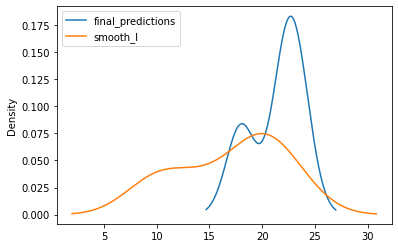

In [ ]:
ax =df_s_m.plot.kde()

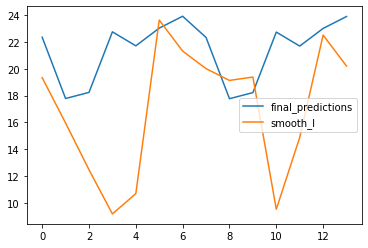

In [ ]:
lines = df_s_m.plot.line()

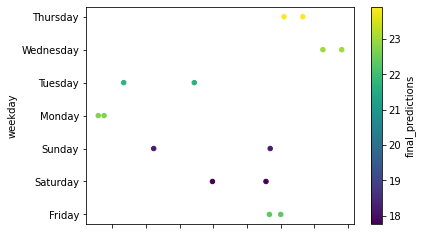

In [ ]:
ax2 = df_s_m.plot.scatter(x='smooth_I',
                      y='weekday',
                      c='final_predictions',
                      colormap='viridis')

In [ ]:
final_predictions=df_predict[['future_dates','final_predictions']]
final_predictions

,future_dates,final_predictions
0,12/01/17,22.341571
1,12/02/17,17.777227
2,12/03/17,18.232015
3,12/04/17,22.742673
4,12/05/17,21.699722
5,12/06/17,23.016964
6,12/07/17,23.903702
7,12/08/17,22.322831
8,12/09/17,17.762314
9,12/10/17,18.216718


In [ ]:
writer = pd.ExcelWriter('итог.xlsx')
final_predictions.to_excel(writer, sheet_name='bar')
writer.save()